# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [162]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [164]:
df_X=diabetes.data
df_y=diabetes.target
# df_X

In [165]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [166]:
diabetes_df = pd.DataFrame(data = df_X, columns=diabetes.feature_names)
diabetes_df['target'] = df_y
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [167]:
X = diabetes_df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']]

y = diabetes_df['target'].values

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [169]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


https://wikidocs.net/157461

In [170]:
diabetes_corr = diabetes_df.corr() #궁금해서 해봄
diabetes_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [171]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [172]:
W

array([0.73272925, 0.675133  , 0.33108197, 0.18244968, 0.90053935,
       0.139114  , 0.9845121 , 0.14069549, 0.27347471, 0.43062395])

In [173]:
b

0.2928325688622251

In [174]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X.iloc[:, i] * W[i]
    predictions += b
    return predictions

In [175]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [176]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [177]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len((y))
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [178]:
import numpy as np
dW, db = gradient(X, W, b, y)

print("dW:", dW)
print("db:", db)

dW: age   -1.370078
sex   -0.312145
bmi   -4.292259
bp    -3.229139
s1    -1.545157
s2    -1.268548
s3     2.893000
s4    -3.149245
s5    -4.140013
s6    -2.796292
dtype: float64
db: -303.68130318806743


In [179]:
LEARNING_RATE = 0.0001

In [180]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28345.1518
Iteration 20 : Loss 28255.1655
Iteration 30 : Loss 28165.5381
Iteration 40 : Loss 28076.2682
Iteration 50 : Loss 27987.3545
Iteration 60 : Loss 27898.7955
Iteration 70 : Loss 27810.5897
Iteration 80 : Loss 27722.7358
Iteration 90 : Loss 27635.2324
Iteration 100 : Loss 27548.0781
Iteration 110 : Loss 27461.2714
Iteration 120 : Loss 27374.8111
Iteration 130 : Loss 27288.6956
Iteration 140 : Loss 27202.9236
Iteration 150 : Loss 27117.4939
Iteration 160 : Loss 27032.4049
Iteration 170 : Loss 26947.6553
Iteration 180 : Loss 26863.2438
Iteration 190 : Loss 26779.1690
Iteration 200 : Loss 26695.4296
Iteration 210 : Loss 26612.0243
Iteration 220 : Loss 26528.9516
Iteration 230 : Loss 26446.2104
Iteration 240 : Loss 26363.7991
Iteration 250 : Loss 26281.7167
Iteration 260 : Loss 26199.9616
Iteration 270 : Loss 26118.5327
Iteration 280 : Loss 26037.4286
Iteration 290 : Loss 25956.6480
Iteration 300 : Loss 25876.1896
Iteration 310 : Loss 25796.0522
Iteration 320 : L

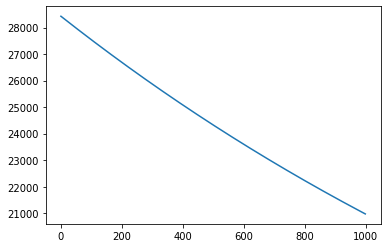

In [181]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [182]:
W, b

(age    0.929697
 sex    0.649382
 bmi    0.736551
 bp     0.489308
 s1     0.983138
 s2     0.194698
 s3     0.738372
 s4     0.371520
 s5     0.612963
 s6     0.634961
 dtype: float64,
 27.55557997724255)

In [183]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

23282.839124039845

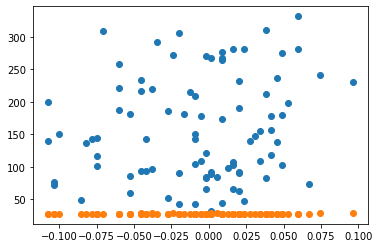

In [184]:
plt.scatter(X_test.iloc[:, 0], y_test)
plt.scatter(X_test.iloc[:, 0], prediction)
plt.show()

In [185]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [186]:
model.fit(X_train, y_train)

LinearRegression()

In [187]:
predictions = model.predict(X_test)
predictions

array([195.88049677, 219.9869973 , 121.41731446, 158.096774  ,
       199.41301643, 128.03683528, 100.64085969, 235.20267685,
       178.49979907, 214.01527918,  56.01821838, 199.16293283,
       176.62264109, 144.48999932, 221.42867632, 113.97468265,
       124.09435034,  62.78851419,  80.68437133, 142.4717434 ,
       131.1218549 , 124.34002996, 160.57566929, 184.64649247,
       124.65094908,  86.5043832 , 249.70362665, 206.59565158,
        74.10940066, 181.06901941,  86.57575242, 125.23114985,
       122.36969588,  86.94561886, 110.23320888, 177.17414005,
       244.58581118, 127.22740857, 192.62016918,  44.50397637,
        80.85086292, 137.48888137, 176.82937956, 232.4837589 ,
       146.96380352, 156.63916936, 245.39934225, 143.95321259,
       238.1797092 , 177.76094989, 249.74477039,  49.9951688 ,
       221.18035895, 166.30347091, 138.54688006, 104.05126515,
        79.71177651, 107.56496588, 206.9860171 , 225.0975009 ,
        78.32242286, 159.35679291, 149.57006718, 188.43

In [188]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2981.5854714667616

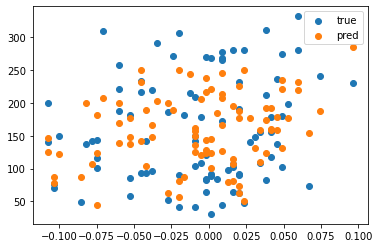

In [189]:
plt.scatter(X_test.iloc[:, 0], y_test, label="true")
plt.scatter(X_test.iloc[:, 0], predictions, label="pred")
plt.legend()
plt.show()

### 회고1

선형회귀를 공부하면서 손실함수, 기울기, 경사하강법을 통해 그래프도 그려보고 오차도 최소화할 수 있는 시간이었다.
상관계수를 구해본 다음 모델학습을 시켜 최적화까지 만드는 이번 노드를 최소 3번은 따라 해본 거 같다.
따라 하면 할수록 시각이 달라져서 안 보이던 게 보이고 새로운 코드도 공부하고 처음엔 접근하기 어려웠지만 결과는 그래도 도전해본 부분을 크게 생각한다. 아쉬운 점은 그래프가 맘에 안 들어서 다른 방법으로 해보고 싶지만, 너무 지친 나머지 이번에도 여기서 끝내버렸다.
이론을 더 공부하고 그래프가 성장할 수 있도록 노력 예정이다.


# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [190]:
#그냥 한번 더 상기시키기
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [192]:
test = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(test.shape)
test.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [194]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [195]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [196]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [197]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['seconds'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,seconds
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='seconds', ylabel='count'>

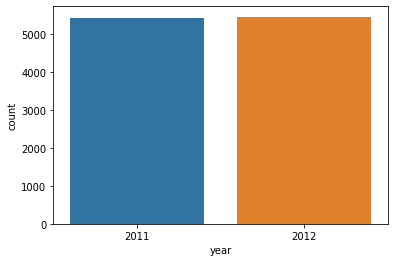

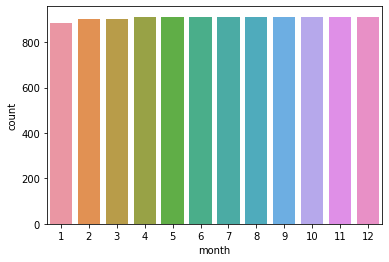

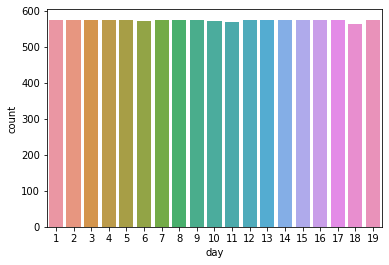

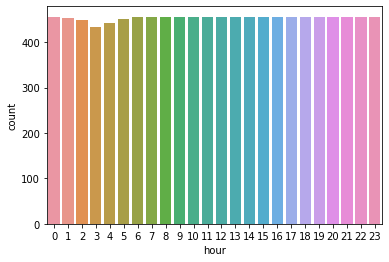

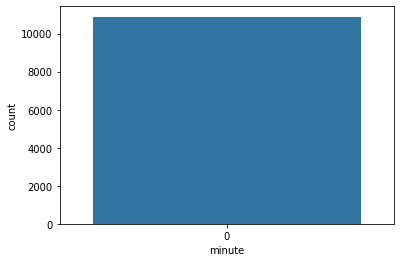

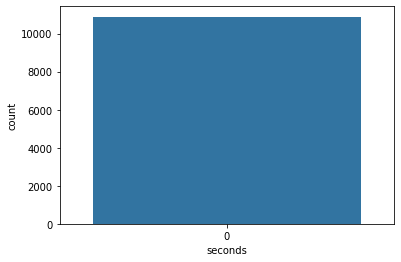

In [198]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()


sns.countplot(ax=ax1, x = 'year', data = train)

sns.countplot(ax=ax2, x = 'month', data = train)

sns.countplot(ax=ax3, x = 'day', data = train)

sns.countplot(ax=ax4, x = 'hour', data = train)

sns.countplot(ax=ax5, x = 'minute', data =train)

sns.countplot(ax=ax6, x = 'seconds', data = train)



시각화 했는데 차이가,,보이지 않는다?

<AxesSubplot:xlabel='temp', ylabel='count'>

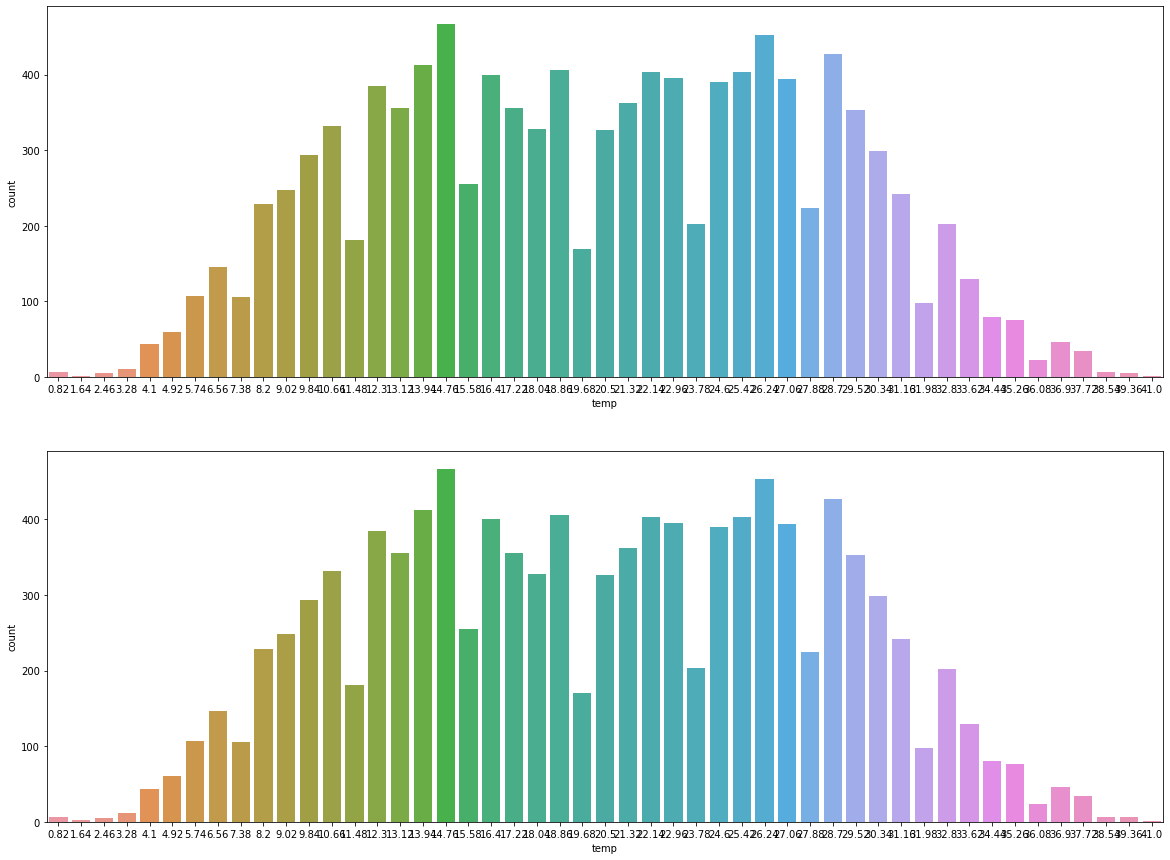

In [199]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)


sns.countplot(data = train, x = 'temp', ax = ax1)
sns.countplot(data = test, x = 'temp', ax = ax2)

<AxesSubplot:xlabel='month', ylabel='count'>

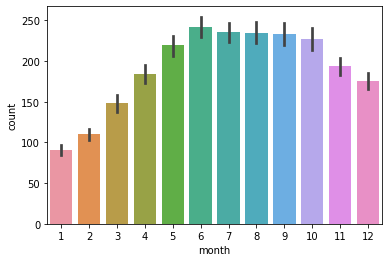

In [200]:
sns.barplot(data=train, x = 'month', y = 'count')

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [202]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression()

In [204]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

슝=3


In [205]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [206]:
predictions = model.predict(X_test)
predictions

array([195.88049677, 219.9869973 , 121.41731446, 158.096774  ,
       199.41301643, 128.03683528, 100.64085969, 235.20267685,
       178.49979907, 214.01527918,  56.01821838, 199.16293283,
       176.62264109, 144.48999932, 221.42867632, 113.97468265,
       124.09435034,  62.78851419,  80.68437133, 142.4717434 ,
       131.1218549 , 124.34002996, 160.57566929, 184.64649247,
       124.65094908,  86.5043832 , 249.70362665, 206.59565158,
        74.10940066, 181.06901941,  86.57575242, 125.23114985,
       122.36969588,  86.94561886, 110.23320888, 177.17414005,
       244.58581118, 127.22740857, 192.62016918,  44.50397637,
        80.85086292, 137.48888137, 176.82937956, 232.4837589 ,
       146.96380352, 156.63916936, 245.39934225, 143.95321259,
       238.1797092 , 177.76094989, 249.74477039,  49.9951688 ,
       221.18035895, 166.30347091, 138.54688006, 104.05126515,
        79.71177651, 107.56496588, 206.9860171 , 225.0975009 ,
        78.32242286, 159.35679291, 149.57006718, 188.43

In [207]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2981.5854714667616

x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [208]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'seconds'],
      dtype='object')

In [209]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [210]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,seconds
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [211]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:xlabel='year', ylabel='count'>

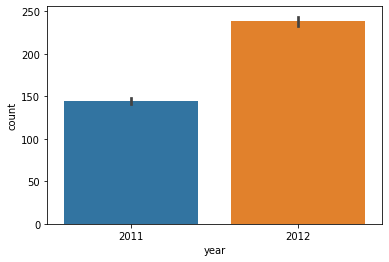

In [212]:
sns.barplot(data=train, x = 'year', y = 'count')

<AxesSubplot:xlabel='month', ylabel='count'>

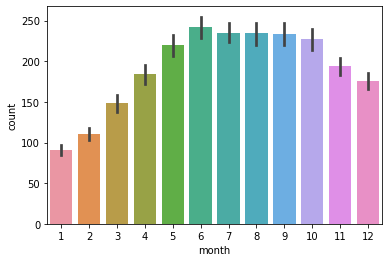

In [213]:
sns.barplot(data=train, x = 'month', y = 'count')

<AxesSubplot:xlabel='day', ylabel='count'>

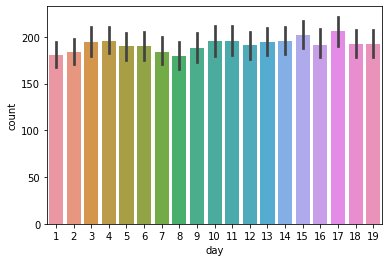

In [214]:
sns.barplot(data = train, x = 'day', y='count')

<AxesSubplot:xlabel='temp', ylabel='count'>

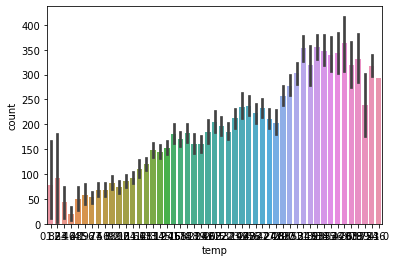

In [215]:
sns.barplot(data=train, x = 'temp', y = 'count')

<AxesSubplot:xlabel='temp', ylabel='count'>

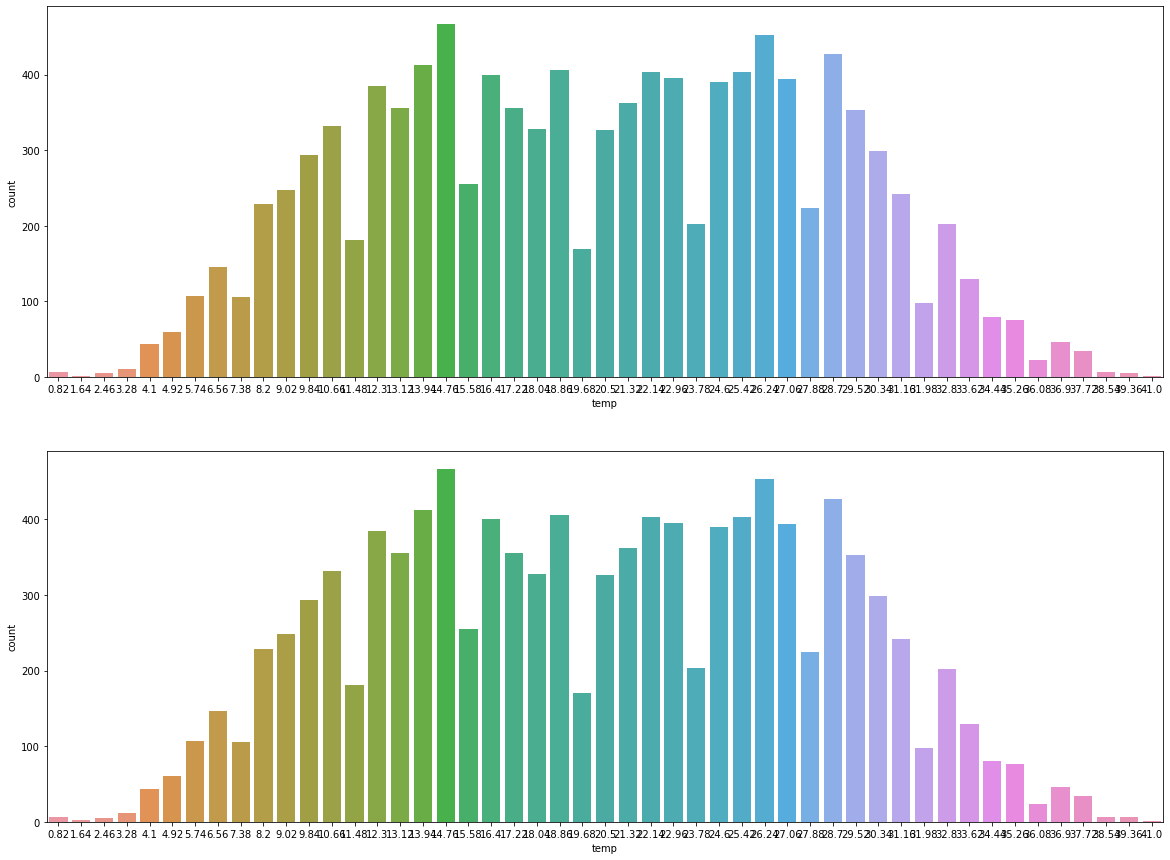

In [216]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)


sns.countplot(data = train, x = 'temp', ax = ax1)
sns.countplot(data = test, x = 'temp', ax = ax2)

<AxesSubplot:xlabel='humidity', ylabel='count'>

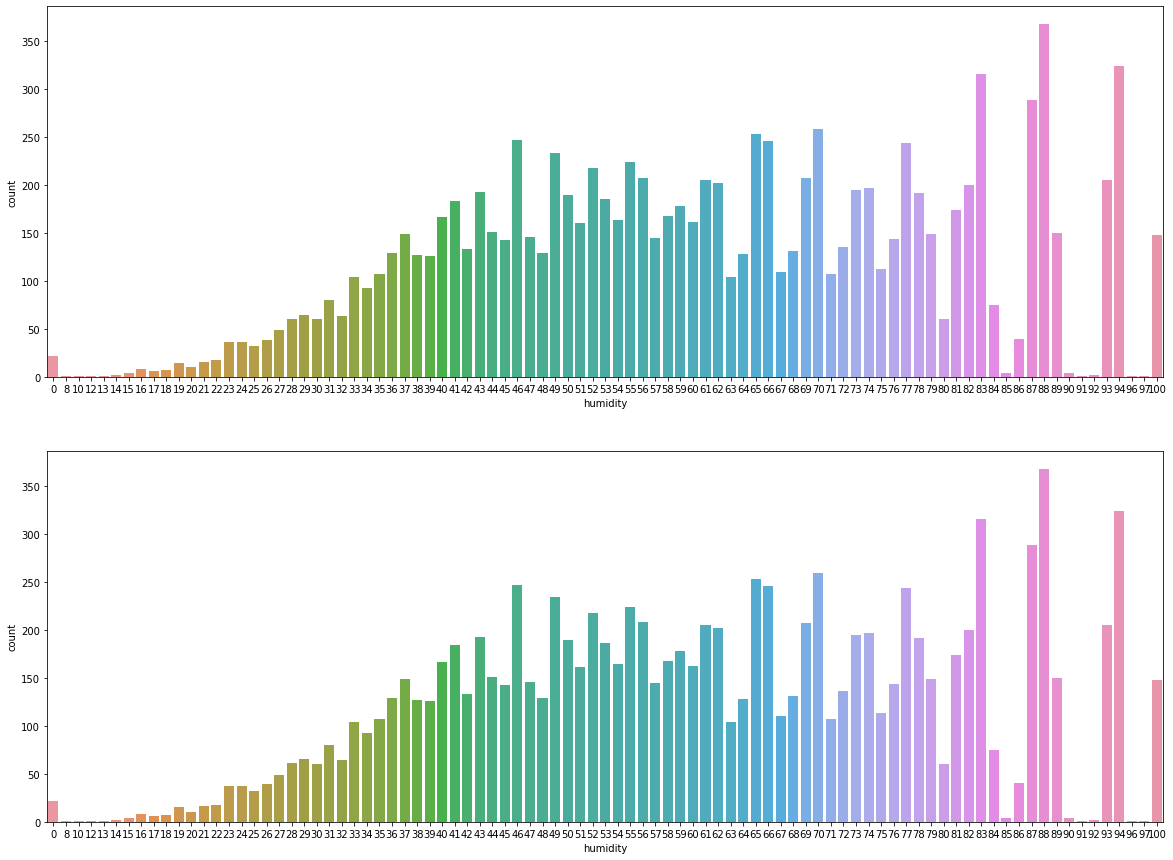

In [217]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(20,15)


sns.countplot(data = train, x = 'humidity', ax = ax1)
sns.countplot(data = test, x = 'humidity', ax = ax2)

### 회고

이번 프로젝트는 정리되지 않은 거 같아 아주 아쉽다.
노드에서 제시한 문제들을 먼저 끝내고 추가로 하려니까 코드가 되던 것도 꼬여서 실행이 안 되고 추가로 계속 실행해보니 순서 정돈이 필요할 거 같다.
그래도 이번 프로젝트는 캐글에서 제공해주기 때문에 많은 자료가 있어서 훨씬 광범위하게 공부할 수 있어서 좋았다.